Let's load the packages and data that are necessary for the exercises.

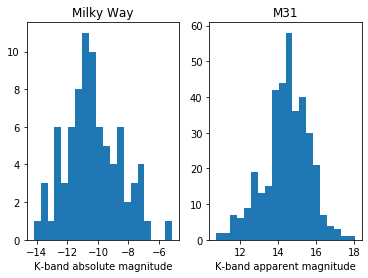

In [44]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
"""
# Nearby Spiral Globular Cluster Systems I: Luminosity Functions;
# Nantais J.B., Huchra J.P., Barmby P., Olsen K.A.G., Jarrett T.H.,
# Astronomical Journal 131, 1416-1425 (2006)
"""

absolute_MWG = np.loadtxt("GC_MWG_absolute.dat")
apparent_M31 = np.loadtxt("GC_M31_apparent.dat")

plt.figure()
plt.subplot(121)
plt.title("Milky Way")
plt.hist(absolute_MWG, bins=20)
plt.xlabel("K-band absolute magnitude")

plt.subplot(122)
plt.title("M31")
plt.hist(apparent_M31, bins=20)
plt.xlabel("K-band apparent magnitude")
plt.show()

## Exercise 1: looking at M31 globular clusters
#### (a) Is the M31 data normally distributed? Use a parametric test.
#### (b) Repeat but now use Kolmogorov-Smirnov test. What is going on in the case? Are there non-parametric tests that can bypass this complication?

In [45]:
_, pvalue = st.shapiro(apparent_M31)
print(pvalue)

0.0010170453460887074


In [46]:
_, pvalue = st.normaltest(apparent_M31)
print(pvalue)

0.004141081471348791


In [62]:
mean = np.mean(apparent_M31)
std = np.std(apparent_M31)
normal_approximation = st.norm(loc=mean, scale=std)
_, pvalue = st.kstest(apparent_M31, normal_approximation.cdf)
print(pvalue)

0.10845462952251585


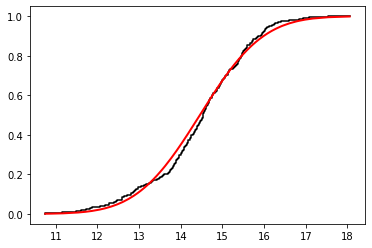

In [63]:
plt.figure()
x_empirical = np.sort(apparent_M31)
y_empirical = np.arange(len(apparent_M31)) / (len(apparent_M31) - 1.0)

plt.step(x_empirical, y_empirical, "k-")
plt.plot(bins, normal_approximation.cdf(bins), "r-", linewidth=2)
plt.show()

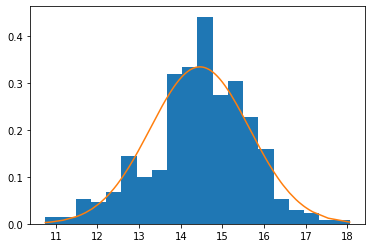

In [65]:
plt.figure()
plt.hist(apparent_M31, bins=20, density=True)
plt.plot(x_empirical, normal_approximation.pdf(x_empirical))
plt.show()

In [68]:
statistic, critical_values, significance_level = st.anderson(apparent_M31)
print(statistic, critical_values, significance_level)

1.7939448091848362 [0.57  0.649 0.779 0.908 1.08 ] [15.  10.   5.   2.5  1. ]


#### (b) Whare are the variances of M31 and Milky Way data? Are the significantly different?

In [16]:
print("MWG variance = {:.4f}".format(np.var(absolute_MWG)))
print("M31 variance = {:.4f}".format(np.var(apparent_M31)))

_, pvalue = st.levene(absolute_MWG, apparent_M31)
print(pvalue)

_, pvalue = st.bartlett(absolute_MWG, apparent_M31)
print(pvalue)

_, pvalue = st.fligner(absolute_MWG, apparent_M31)
print(pvalue)

MWG variance = 3.2127
M31 variance = 1.4235
3.847751883261496e-06
3.4887961975701937e-07
1.4026321940174588e-05


## Exercise 2: the distance of M31
#### (a) Using the Milky Way data as the GCLF, what is the distance of M31? Express it as distance modulus $\mu$ or metric distance using the formulas.

Remember that the distance modulus $\mu$, the absolute $M$ and apparent magnitude $m$ are connected through:

$$ \mu = m - M $$

Also, the metric distance $d$ (in Mpc) can be computed from the distance modulus:

$$ d = 10^{\mu / 5 - 5} $$

Assume that
- the GCLF in M31 is the same with the Milky Way 
- our data are complete and there are no absorption effects
- the distance of GCs from the center of M31 is small compared to the distance from us

In [30]:
#print(np.mean(apparent_M31) - np.mean(absolute_MW))
mwg_mean, mwg_sem = np.mean(absolute_MWG), st.sem(absolute_MWG)
m31_mean, m31_sem = np.mean(apparent_M31), st.sem(apparent_M31)
print("Milky way mean: {:.2f} +/- {:.2f}".format(mwg_mean, mwg_sem))
print("Andromeda mean: {:.2f} +/- {:.2f}".format(m31_mean, m31_sem))

def to_metric(distance_modulus):
    """Convert a distance modulus to metric distance in Mpc."""
    return 10.0 ** (distance_modulus / 5.0 - 5)

modulus = m31_mean - mwg_mean
distance = to_metric(modulus)
print("Distance modulus = {:.3f}".format(modulus))
print("Distance = {:.3g} Mpc".format(distance))

Milky way mean: -10.32 +/- 0.20
Andromeda mean: 14.46 +/- 0.06
Distance modulus = 24.781
Distance = 0.904 Mpc


#### (b) what is the uncertainty of that estimate?

In [38]:
modulus_error = (mwg_sem ** 2.0 + m31_sem ** 2.0) ** 0.5
print("Distance moudlus = {:.3f} +/- {:.3f}".format(modulus, modulus_error))

lower68 = to_metric(modulus - modulus_error)
upper68 = to_metric(modulus + modulus_error)
print("Distance 68% CI = ({:.3f}, {:.3f}) Mpc".format(lower68, upper68))

Distance moudlus = 24.781 +/- 0.210
Distance 68% CI = (0.821, 0.996) Mpc


#### (c) is the computed distance consistent with the Cepheid estimate for the distance modulus: $24.44 \pm 0.10\ \rm mag$?

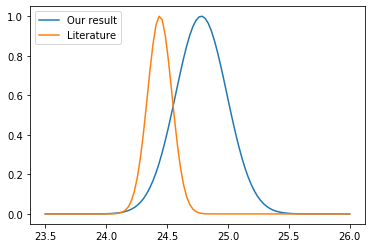

1.467543164997336


In [42]:
cep_modulus = 24.44
cep_modulus_error = 0.1
x = np.linspace(23.5, 26, 100)
y_result = st.norm.pdf(x, loc=modulus, scale=modulus_error)
y_theory = st.norm.pdf(x, loc=cep_modulus, scale=cep_modulus_error)
y_result = y_result / max(y_result)
y_theory = y_theory / max(y_theory)

plt.figure()
plt.plot(x, y_result, label="Our result")
plt.plot(x, y_theory, label="Literature")
plt.legend(loc="upper left")
plt.show()

result_vs_theory_sigmas = (modulus - cep_modulus) / (modulus_error ** 2.0 + cep_modulus_error ** 2.0) ** 0.5
print(result_vs_theory_sigmas)

#### (d) Using the distance estimate, calculate the absolute magnitudes of M31 GCs and check if they follow the same distribution as MW GCs

## Extra exercise 1: Normal approximation of Poisson distribution

It is known that the normal distribution is a good approximation of Poisson distribution when the parameter $\lambda$ is large.

#### (a) Can you quantify this claim using sampling and hypothesis testing? Choose a sample size $N$ and some $\lambda$ values.

#### (b) Do the results depend on the sample size?

#### (c) Do the results depend on the method? Use two tests at least.

For l=0.5
  SW: p-value = 5.9e-39
  KS: p-value = 3.95e-122
For l=3
  SW: p-value = 3.25e-18
  KS: p-value = 1.35e-18
For l=10
  SW: p-value = 2.7e-10
  KS: p-value = 2.55e-08
For l=30
  SW: p-value = 5.5e-06
  KS: p-value = 1.58e-05


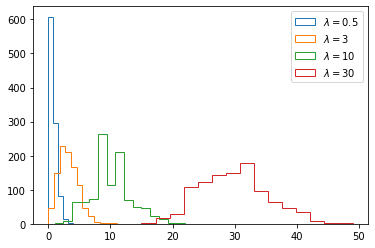

In [43]:
plt.figure()
sample_size = 1000
poisson_means_to_test = [0.5, 3, 10, 30]
for poisson_mean in poisson_means_to_test:
    sample = st.poisson.rvs(poisson_mean, size=sample_size)
    statistic, pvalue = st.shapiro(sample)
    print("For l={:.3g}".format(poisson_mean))
    print("  SW: p-value = {:.3g}".format(pvalue))
    
    norm_cdf = st.norm(loc=poisson_mean, scale=poisson_mean ** 0.5).cdf
    statistic, pvalue = st.kstest(sample, norm_cdf)
    print("  KS: p-value = {:.3g}".format(pvalue))
    
    nbins = min(15, max(sample) - min(sample) + 1)
    plt.hist(sample, bins=nbins, label=r"$\lambda = {:.2g}$".format(poisson_mean), histtype="step")
plt.legend()
plt.show()

## Extra exercise 2: Testing normality through K-S

#### (a) Can you test for 'normality' using the K-S test?

#### (b) If yes, how does it compare to the Shapiro-Wilk test when applied to our data (MW and M31)?